In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from pandas import DataFrame

In [4]:
data = pd.read_csv("/Users/charanjeetkaur/Downloads/Mall_Customers.csv")

# Exploratory data analysis

This is the process of investigating the available data and determining inconsistencies in patterns and other anomalies with the help of graphical representations and statistical summaries.

Checking the head of the data.

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
print("Dataset shape:", data.shape)

Dataset shape: (250, 5)


Next, we check if the dataset has any missing values.

In [7]:
data.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

The above output means there are no missing values in our dataset. Since our data is ready to use, let us extract the Annual Income and the Spending Score columns and apply our DBSCAN model to them.

In [8]:
x = data.loc[:, ['Annual Income (k$)',
                 'Spending Score (1-100)']].values

# Before we apply the DBSCAN model, first, we need to obtain its two parameters.

MinPoints: We can obtain the minimum number of Points to be used to recognize a cluster, as follows:
If the dataset has two dimensions, use the min sample per cluster as 4.
If the data has more than two dimensions, the min sample per cluster should be: Min_sample(MinPoints) = 2 * Data dimension
Since our data is two-dimensional, we shall use the default value of 4 as our MinPoint parameter.

Epsilon (Eps): To calculate the value of Eps, we shall calculate the distance between each data point to its closest neighbor using the Nearest Neighbours. After that, we sort them and finally plot them. From the plot, we identify the maximum value at the curvature of the graph. This value is our Eps.


In [10]:
from sklearn.cluster import DBSCAN

In [21]:
dbscan = DBSCAN(eps = 8, min_samples = 4).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

In [22]:
labels

array([ 2,  0,  1,  0,  2,  0,  1, -1,  1,  0,  1, -1,  1,  0,  1,  0,  2,
        0,  2, -1,  2,  0,  1,  0, -1,  0,  2, -1,  2,  0,  1,  0, -1,  0,
       -1,  0, -1,  0,  3,  0,  3, -1,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  3,  3,  3,  4,  3,  4,  3,  4,  5,  4,  5,  4,  3,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,
        4,  5,  4,  5,  4,  5,  4,  3,  4,  5,  4,  5,  4,  5,  4,  5,  4,
        5,  4,  5,  4,  5,  4,  5,  4,  5,  4, -1,  4,  5,  4, -1, -1,  6,
       -1,  6,  4,  6, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  7, -1,  7, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [23]:
len(set(labels))

9

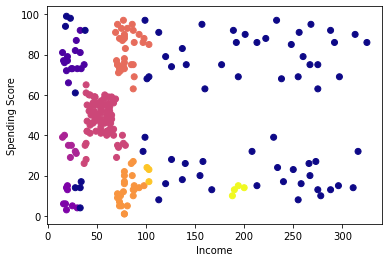

In [12]:
# Plot the clusters
plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
plt.xlabel("Income") # X-axis label
plt.ylabel("Spending Score") # Y-axis label
plt.show() # showing the plot

In [25]:
from sklearn import metrics

In [26]:
print(metrics.silhouette_score(x,labels))

0.2635969658027316
